# Visualización 4: grafos con Networkx.

## Introducción a teoría de grafos

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
G = nx.Graph()

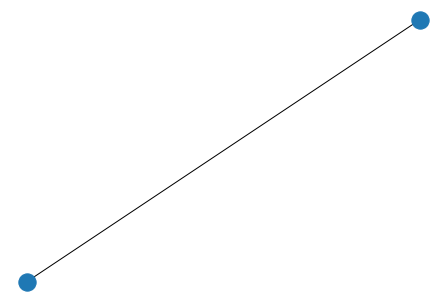

In [13]:
G = nx.Graph()

G.add_nodes_from(['A', 'B'])

G.add_edge('A', 'B')

nx.draw(G)

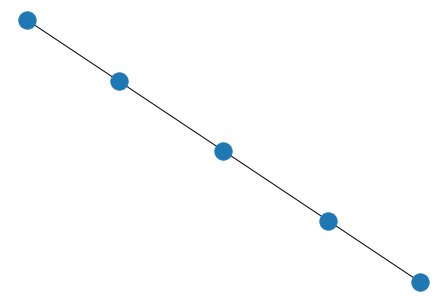

In [14]:
K = nx.Graph()
K.add_nodes_from(['N', 'B', 'M', 'P', 'D'])
K.add_edge('N', 'B')
K.add_edge('B', 'M')
K.add_edge('M', 'P')
K.add_edge('P', 'D')


nx.draw(K)

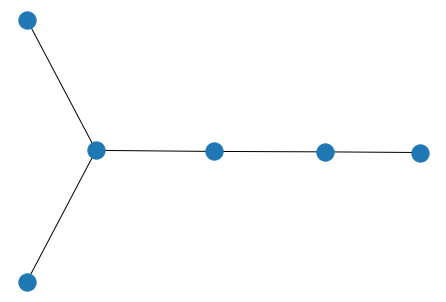

In [15]:
F = nx.compose(G, K)
nx.draw(F)

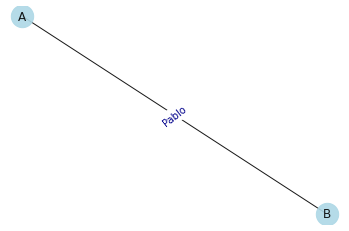

In [20]:
pos = nx.spring_layout(G)
#plt.figure()

nx.draw_networkx_edge_labels(G,
                             pos,
                             edge_labels={('A','B'):'Pablo'},
                             font_color='darkblue')

nx.draw(G,
        edge_color='black',
        width=1,
        linewidths=1,
        node_size=500,
        node_color='lightblue',
        alpha=0.9,
        with_labels=True,
        labels={node:node for node in G.nodes()})

## Partes de un grafo

In [20]:
# Lista de nodos
G.nodes()

NodeView(('A', 'B'))

In [21]:
# Lista de nodos con atributos
G.nodes(data=True)

NodeDataView({'A': {}, 'B': {}})

In [23]:
# Lista de conexiones
G.edges()

EdgeView([('A', 'B')])

In [24]:
# Lista de conexiones con atributos
G.edges(data=True)

EdgeDataView([('A', 'B', {})])

## Tipos de grafos

**Grafo simple.** O simplemente grafo es aquel que acepta una sola una arista uniendo dos vértices cualesquiera. Esto es equivalente a decir que una arista cualquiera es la única que une dos vértices específicos. Es la definición estándar de un grafo.

**Multigrafo.** O pseudografo son grafos que aceptan más de una arista entre dos vértices. Estas aristas se llaman múltiples o lazos (loops en inglés). Los grafos simples son una subclase de esta categoría de grafos. También se les llama grafos no-dirigido.

**Grafo dirigido.** Son grafos en los cuales se ha añadido una orientación a las aristas, representada gráficamente por una flecha

**Grafo etiquetado.** Grafos en los cuales se ha añadido un peso a las aristas (número entero generalmente) o un etiquetado a los vértices.

**Grafo aleatorio.** Grafo cuyas aristas están asociadas a una probabilidad.

**Hipergrafo.** Grafos en los cuales las aristas tienen más de dos extremos, es decir, las aristas son incidentes a 3 o más vértices.

**Grafo infinito.** Grafos con conjunto de vértices y aristas de cardinal infinito.

## Centralidad

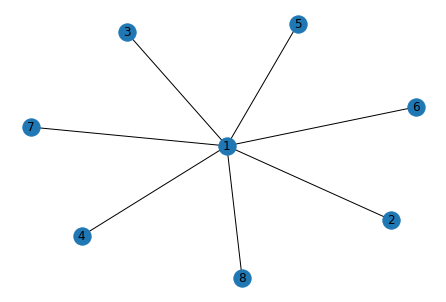

In [25]:
conexiones = [(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8)]
H = nx.Graph(conexiones)
nx.draw(H, with_labels=True)

La métrica más importante utilizada para medir la importancia de un Nodo.

**Número de vecinos que tengo / Número de vecinos que podría tener**

In [26]:
[n for n in H.neighbors(1)]

[2, 3, 4, 5, 6, 7, 8]

In [27]:
nx.degree_centrality(H)

{1: 1.0,
 2: 0.14285714285714285,
 3: 0.14285714285714285,
 4: 0.14285714285714285,
 5: 0.14285714285714285,
 6: 0.14285714285714285,
 7: 0.14285714285714285,
 8: 0.14285714285714285}

## Centralidad de intermediación

Cuántas veces un nodo está en el camino (ruta geodésica) que conecta los otros nodos.

**Número de caminos cortos a través de un nodo / Todos los posibles caminos cortos**

In [29]:
nx.betweenness_centrality(H)

{1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}

Ejemplo práctico: plano de metro de una ciudad.

## Caso de uso: Popularidad

In [4]:
import csv

in_file=csv.reader(open('amigos.txt','r'))

I=nx.Graph()

for line in in_file:
    I.add_edge(line[0],line[1])

In [5]:
I.nodes(data=True)

NodeDataView({'Alvaro': {}, 'Ana': {}, 'Manuela': {}, 'Beatriz': {}, 'Teresa': {}, 'Paula': {}, 'Marta': {}, 'Rocio': {}, 'Paco': {}, 'Juan': {}, 'Jose': {}, 'Pedro': {}, 'Alberto': {}, 'Miguel': {}})

In [6]:
I.edges(data=True)

EdgeDataView([('Alvaro', 'Ana', {}), ('Alvaro', 'Manuela', {}), ('Alvaro', 'Beatriz', {}), ('Alvaro', 'Teresa', {}), ('Alvaro', 'Paula', {}), ('Alvaro', 'Marta', {}), ('Alvaro', 'Rocio', {}), ('Alvaro', 'Paco', {}), ('Alvaro', 'Juan', {}), ('Alvaro', 'Jose', {}), ('Alvaro', 'Pedro', {}), ('Alvaro', 'Alberto', {}), ('Ana', 'Miguel', {}), ('Ana', 'Manuela', {}), ('Ana', 'Beatriz', {}), ('Manuela', 'Teresa', {}), ('Manuela', 'Paula', {}), ('Manuela', 'Rocio', {}), ('Manuela', 'Paco', {}), ('Manuela', 'Juan', {}), ('Manuela', 'Alberto', {}), ('Manuela', 'Pedro', {}), ('Manuela', 'Marta', {}), ('Beatriz', 'Teresa', {}), ('Beatriz', 'Rocio', {}), ('Beatriz', 'Alberto', {}), ('Teresa', 'Miguel', {}), ('Teresa', 'Paco', {}), ('Rocio', 'Paco', {}), ('Juan', 'Miguel', {})])

In [7]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]

    maxnode1 = set()
    maxnode2 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)

    return maxnode1,maxnode2

In [8]:
top_deg_dc,top2_deg_dc = find_nodes_with_highest_deg_cent(I)

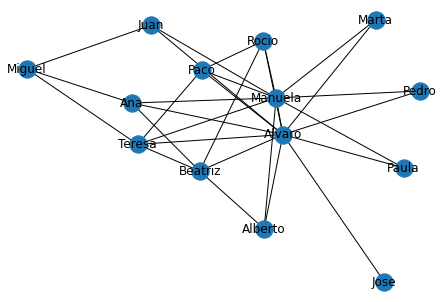

In [9]:
nx.draw(I, with_labels=True)

In [22]:
print(top_deg_dc,top2_deg_dc)

{'Alvaro'} {'Manuela'}


In [37]:
nx.degree_centrality(I)

{'Alvaro': 0.9230769230769231,
 'Ana': 0.3076923076923077,
 'Manuela': 0.7692307692307693,
 'Beatriz': 0.38461538461538464,
 'Teresa': 0.38461538461538464,
 'Paula': 0.15384615384615385,
 'Marta': 0.15384615384615385,
 'Rocio': 0.3076923076923077,
 'Paco': 0.3076923076923077,
 'Juan': 0.23076923076923078,
 'Jose': 0.07692307692307693,
 'Pedro': 0.15384615384615385,
 'Alberto': 0.23076923076923078,
 'Miguel': 0.23076923076923078}